In [1]:
import pandas as pd
import numpy as np

import dask.dataframe as dd

In [2]:
index = pd.date_range("2021-09-01", periods=2400, freq="1H")
df = pd.DataFrame({"a": np.arange(2400), "b": list("abcaddbe" * 300)}, index=index)
ddf = dd.from_pandas(df, npartitions=10)

ddf

,a,b
npartitions=10,,
2021-09-01 00:00:00,int64,object
2021-09-11 00:00:00,...,...
...,...,...
2021-11-30 00:00:00,...,...
2021-12-09 23:00:00,...,...


In [3]:
ddf.b

Dask Series Structure:
npartitions=10
2021-09-01 00:00:00    object
2021-09-11 00:00:00       ...
                        ...  
2021-11-30 00:00:00       ...
2021-12-09 23:00:00       ...
Name: b, dtype: object
Dask Name: getitem, 2 graph layers

In [4]:
ddf["2021-10-01": "2021-10-09 5:00"].compute()

,a,b
2021-10-01 00:00:00,720,a
2021-10-01 01:00:00,721,b
2021-10-01 02:00:00,722,c
2021-10-01 03:00:00,723,a
2021-10-01 04:00:00,724,d
...,...,...
2021-10-09 01:00:00,913,b
2021-10-09 02:00:00,914,c
2021-10-09 03:00:00,915,a
2021-10-09 04:00:00,916,d


In [5]:
ddf.partitions[1]

,a,b
npartitions=1,,
2021-09-11,int64,object
2021-09-21,...,...


In [6]:
ddf.a.mean().compute()

1199.5

In [7]:
ddf.b.unique()

Dask Series Structure:
npartitions=1
    object
       ...
Name: b, dtype: object
Dask Name: unique-agg, 4 graph layers

In [8]:
ddf.b.unique().compute()

0    a
1    b
2    c
3    d
4    e
Name: b, dtype: object

In [9]:
result = ddf["2021-10-01": "2021-10-09 5:00"].a.cumsum() - 100
result.compute()

2021-10-01 00:00:00       620
2021-10-01 01:00:00      1341
2021-10-01 02:00:00      2063
2021-10-01 03:00:00      2786
2021-10-01 04:00:00      3510
                        ...  
2021-10-09 01:00:00    158301
2021-10-09 02:00:00    159215
2021-10-09 03:00:00    160130
2021-10-09 04:00:00    161046
2021-10-09 05:00:00    161963
Freq: H, Name: a, Length: 198, dtype: int64

In [10]:
result.dask

HighLevelGraph with 7 layers.
<dask.highlevelgraph.HighLevelGraph object at 0x7f0217147070>
 0. from_pandas-e8d0c92b0364d788dd904838361b0fa2
 1. loc-4d57ed2634286c47ae7720535278fbac
 2. getitem-4abd5e5ddddab80f6cd715ad4c862e3b
 3. series-cumsum-map-ec0a737e92fd3d3fdb31508b4efb8997
 4. series-cumsum-take-last-3d314821fd8abbba14916b16e8e0648b
 5. series-cumsum-560074f709f422817cc9f94ccb8dd221
 6. sub-11050f195b967cdf56e9c4518c59eecf

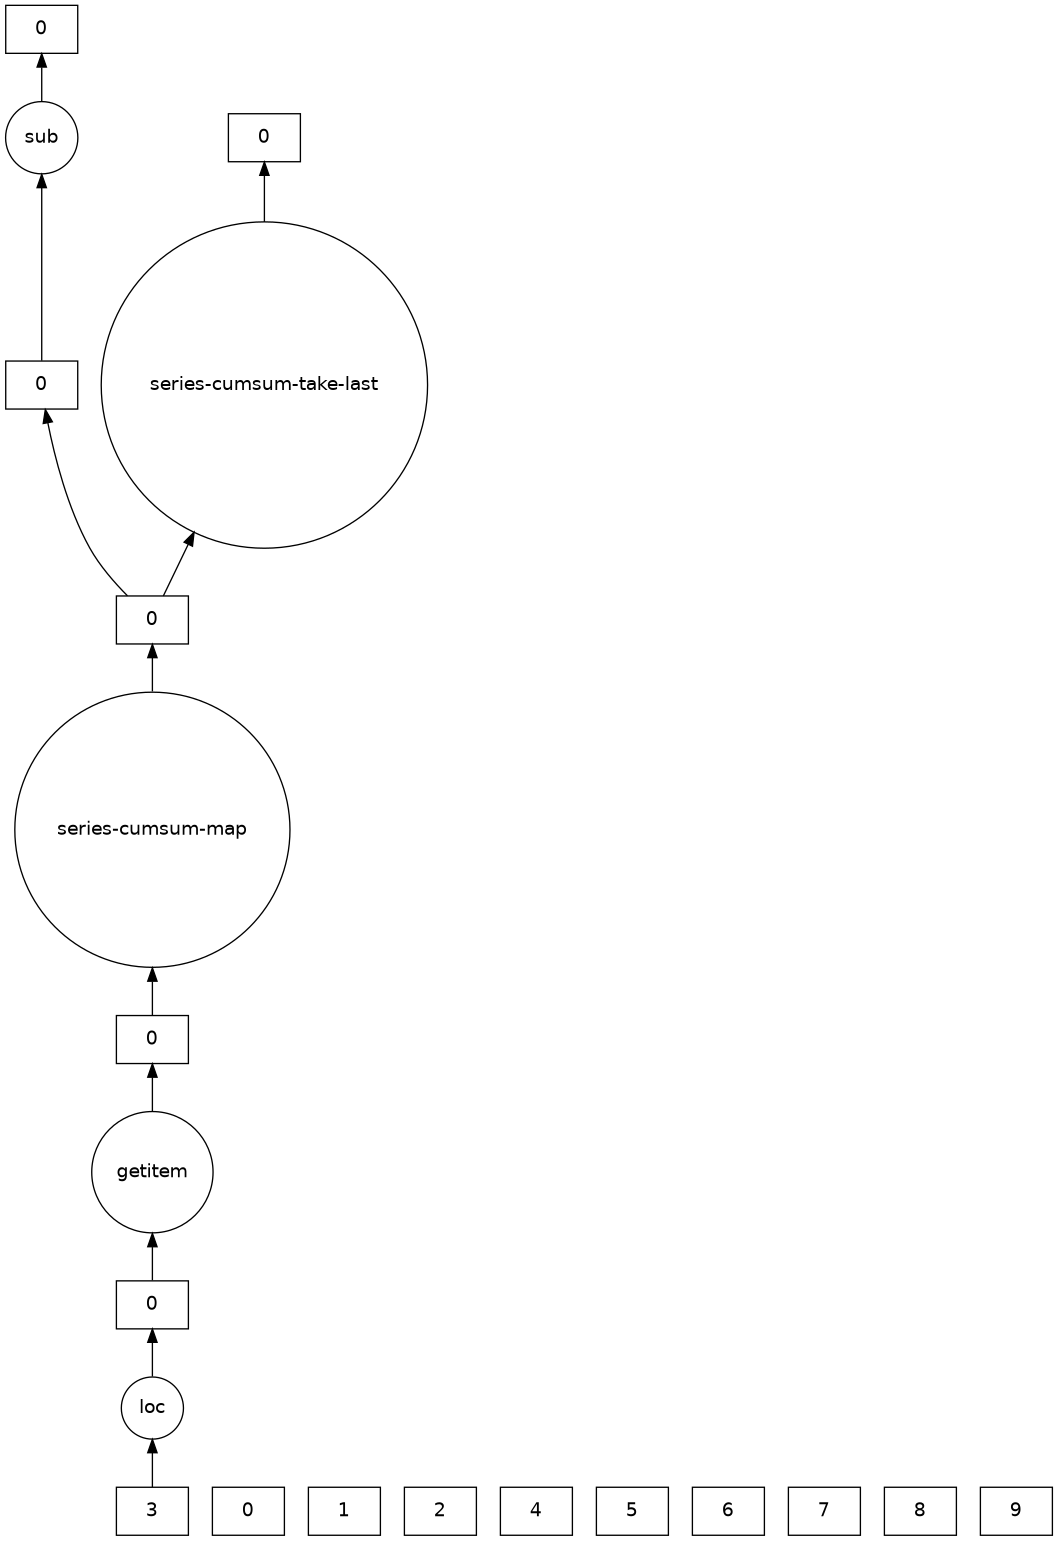

In [14]:
result.visualize(filename='assets/002-lazy-evaluation-graph.png')